In [2]:
!pip install requests

In [3]:
!pip install bs4

In [4]:
! pip install beautifulSoup4

In [5]:
# import the libraries 
# step 1 import libraries
import requests
from bs4 import BeautifulSoup

In [6]:
brands =[]
laptop_name=[]
price = []
rating =[]

In [7]:
# step 2 : store website in url 

for i in range (1,11):

    url = f"https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=7370a68b-a9b1-445f-bb8d-204fc6a6331e&as-searchtext=laptop&page={i}"
    request_header ={
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/144.0.0.0 Safari/537.36 Edg/144.0.0.0',
        'Accept-encoding': 'gzip, deflate, br, zstd'
        
    }

    response = requests.get(url,headers=request_header)
    print(f"Status_code {i}:" , response.status_code)
    
    html_data = response.text
    soup = BeautifulSoup(html_data)
    # print(soup.text)
 
    names = soup.find_all("div",class_="RG5Slk")
    prices = soup.find_all("div",class_="hZ3P6w DeU9vF")
    ratings = soup.find_all("div",class_="MKiFS6")
    for i in names:
        laptop_name.append(i.text)
    
    for i in prices:
        price.append(i.text)
   
    for i in ratings:
        rating.append(i.text)

Status_code 1: 200
Status_code 2: 200
Status_code 3: 200
Status_code 4: 200
Status_code 5: 200
Status_code 6: 200
Status_code 7: 200
Status_code 8: 200
Status_code 9: 200
Status_code 10: 200


In [8]:
print("laptop_name",len(laptop_name))
print("price",len(price))
print("rating",len(rating))

laptop_name 240
price 240
rating 384


In [9]:
min_len = min(
    len(laptop_name),
    len(price),
    len(rating),
)


In [10]:
min_len = min(
    len(laptop_name),
    len(price),
    len(rating),
)
min_len

240

In [11]:
import pandas as pd
import re

# Assuming you already have these lists filled from scraping
# laptop_name, price

In [12]:


# Create initial DataFrame
df = pd.DataFrame({
    "Laptop_Name": laptop_name[:min_len],
    "Price": price[:min_len],
    "Rating": rating[:min_len],
})

# Clean Laptop_Name
def clean_laptop_name(name):
    name = re.sub(r"\(.*?\)", "", name)
    remove_words = [
        "Hexa Core", "Quad Core", "Octa Core",
        "Gen", "with", "Series", "AI PC", "Ultra",
        "Laptop", "Full Metal", "Backlit", "OLED", "Office"
    ]
    for word in remove_words:
        name = name.replace(word, "")
    
    match = re.search(r"(AMD Ryzen \d|Intel Core i\d)", name, re.IGNORECASE)
    if match:
        proc = match.group()
        brand_name = name[:name.find(proc)+len(proc)].strip()
        return " ".join(brand_name.split())
    else:
        return " ".join(name.split()[:3])

df["Laptop_Name"] = df["Laptop_Name"].apply(clean_laptop_name)

# Extract Brand
df["Brand"] = df["Laptop_Name"].str.split().str[0]

# Clean Price
df["Price"] = (
    df["Price"]
    .str.replace("₹","", regex=False)
    .str.replace(",","", regex=False)
    .astype(int)
)

# Clean Rating
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Reorder columns
df = df[["Brand", "Laptop_Name" , "Price" ,"Rating" ]]

df

,Brand,Laptop_Name,Price,Rating
0,ASUS,ASUS Vivobook S14,59990,4.5
1,Lenovo,Lenovo LOQ Essential Intel Core i7,79990,4.5
2,ASUS,ASUS Vivobook Go 15 AMD Ryzen 3,32190,4.3
3,Acer,Acer Aspire 3,23590,3.8
4,Acer,Acer Aspire 3,19590,3.8
...,...,...,...,...
235,HP,HP 255 G10 + FingerPrint AMD Ryzen 5,46990,4.2
236,HP,HP AMD Ryzen 5,39900,4.4
237,MSI,MSI Modern 15 Intel Core i3,42699,4.1
238,Lenovo,Lenovo IdeaPad Slim 5 Intel Core i5,59999,4.5


In [13]:
df.head()

,Brand,Laptop_Name,Price,Rating
0,ASUS,ASUS Vivobook S14,59990,4.5
1,Lenovo,Lenovo LOQ Essential Intel Core i7,79990,4.5
2,ASUS,ASUS Vivobook Go 15 AMD Ryzen 3,32190,4.3
3,Acer,Acer Aspire 3,23590,3.8
4,Acer,Acer Aspire 3,19590,3.8


In [14]:
df.tail()

,Brand,Laptop_Name,Price,Rating
235,HP,HP 255 G10 + FingerPrint AMD Ryzen 5,46990,4.2
236,HP,HP AMD Ryzen 5,39900,4.4
237,MSI,MSI Modern 15 Intel Core i3,42699,4.1
238,Lenovo,Lenovo IdeaPad Slim 5 Intel Core i5,59999,4.5
239,Apple,Apple MacBook Pro,372990,4.5


In [15]:
df.isnull()

,Brand,Laptop_Name,Price,Rating
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
235,False,False,False,False
236,False,False,False,False
237,False,False,False,False
238,False,False,False,False


In [16]:
# Drop any rows with missing laptop name or price
df.dropna(subset=["Laptop_Name","Price"], inplace=True)


In [17]:
df

,Brand,Laptop_Name,Price,Rating
0,ASUS,ASUS Vivobook S14,59990,4.5
1,Lenovo,Lenovo LOQ Essential Intel Core i7,79990,4.5
2,ASUS,ASUS Vivobook Go 15 AMD Ryzen 3,32190,4.3
3,Acer,Acer Aspire 3,23590,3.8
4,Acer,Acer Aspire 3,19590,3.8
...,...,...,...,...
235,HP,HP 255 G10 + FingerPrint AMD Ryzen 5,46990,4.2
236,HP,HP AMD Ryzen 5,39900,4.4
237,MSI,MSI Modern 15 Intel Core i3,42699,4.1
238,Lenovo,Lenovo IdeaPad Slim 5 Intel Core i5,59999,4.5


In [20]:
# extract into .csv format
import pandas as pd
df.to_csv("flipkart_laptop_price_analysis_cleaned.csv" , index = False)

In [21]:
# read csv file

df = pd.read_csv("flipkart_laptop_price_analysis_cleaned.csv")

In [24]:
df.shape[1] # cloumns


4

In [25]:
df.shape[0] # rows

240

In [26]:
df.dtypes

Brand           object
Laptop_Name     object
Price            int64
Rating         float64
dtype: object

In [27]:
# missing values 
df.isnull().sum()

Brand          0
Laptop_Name    0
Price          0
Rating         0
dtype: int64

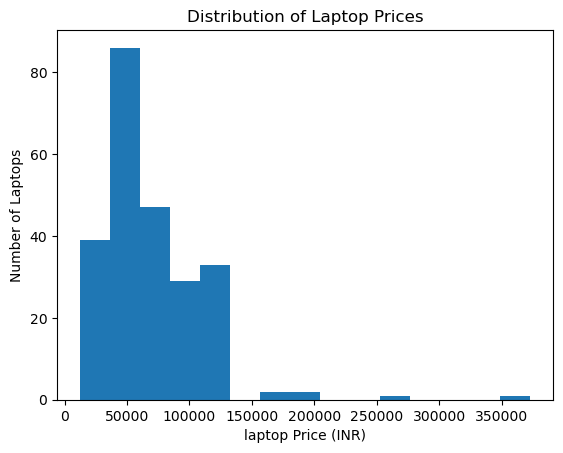

In [30]:
# data visualization 

import matplotlib.pyplot as plt
import seaborn as sns

#  histogram - laptop price distribution 


plt.figure()
plt.hist(df['Price'],bins=15)
plt.title("Distribution of Laptop Prices")
plt.xlabel("laptop Price (INR)")
plt.ylabel("Number of Laptops")
plt.show()

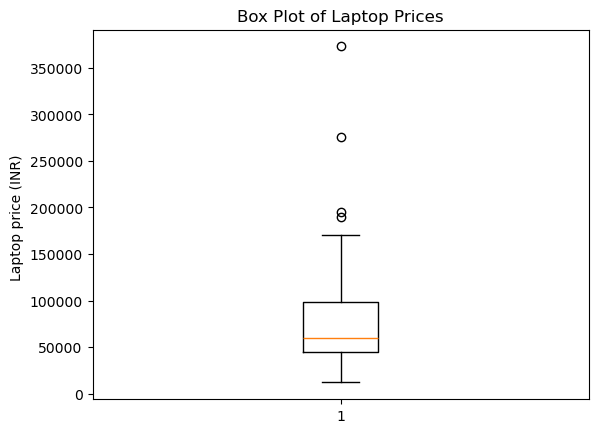

In [31]:
# Box plot 

plt.figure()
plt.boxplot(df['Price'])
plt.ylabel("Laptop price (INR) ")
plt.title("Box Plot of Laptop Prices")
plt.show()

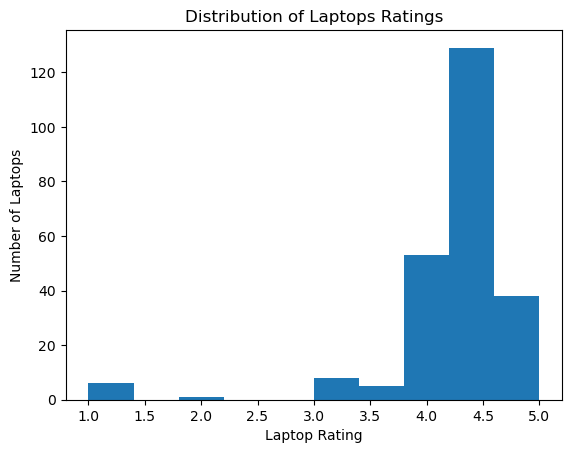

In [32]:
# histogram - laptop ratings 

plt.figure()
plt.hist(df['Rating'],bins=10)
plt.xlabel("Laptop Rating")
plt.ylabel("Number of Laptops")
plt.title("Distribution of Laptops Ratings")
plt.show()

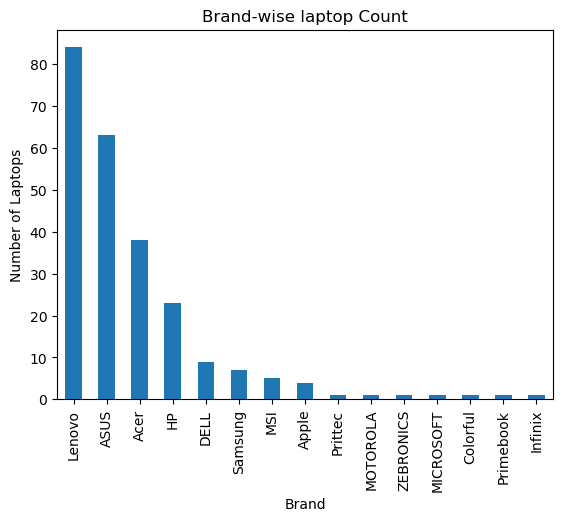

In [33]:
# Brand -wise laptop Count 

brand_count = df['Brand'].value_counts()

plt.figure()
brand_count.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Number of Laptops")
plt.title("Brand-wise laptop Count")
plt.show()

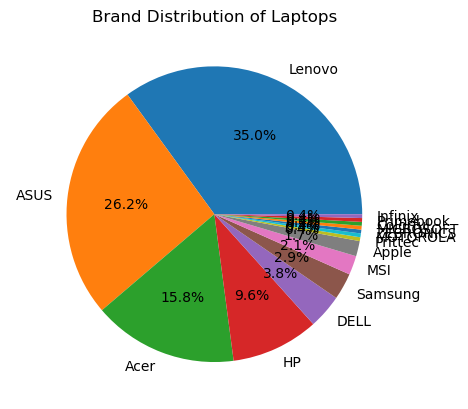

In [40]:
# Brand distribution 

plt.figure()
brand_count.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel(" ")
plt.title("Brand Distribution of Laptops")
plt.show()

# visualize market share of brands 

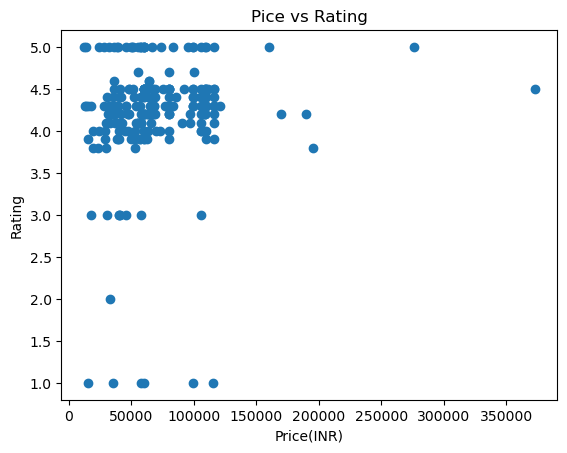

In [41]:
# Scatter plot - price vs rating

plt.figure()
plt.scatter(df['Price'] , df['Rating'])
plt.xlabel("Price(INR)")
plt.ylabel("Rating")
plt.title("Pice vs Rating")
plt.show()


# check relationship between price and rating

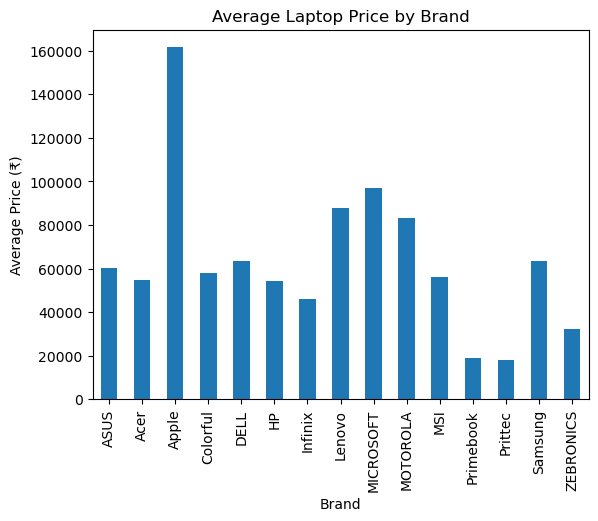

In [42]:
# Average price by Brand

avg_price = df.groupby('Brand')['Price'].mean()

plt.figure()
avg_price.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Average Price (₹)")
plt.title("Average Laptop Price by Brand")
plt.show()


In [43]:
# create Rating Categories 

def rating_category(r):
    if r < 3.5:
        return "low"
    elif r < 4.0:
        return "Medium"
    elif r < 4.5:
        return "Good"
    else:
        return "Excellent"
df['Rating_Category'] = df['Rating'].apply(rating_category)

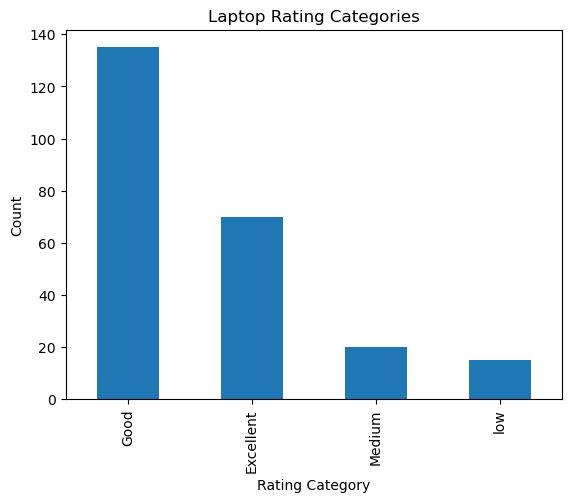

In [45]:
# Rating Category

plt.figure()
df['Rating_Category'].value_counts().plot(kind='bar')
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.title("Laptop Rating Categories")
plt.show()

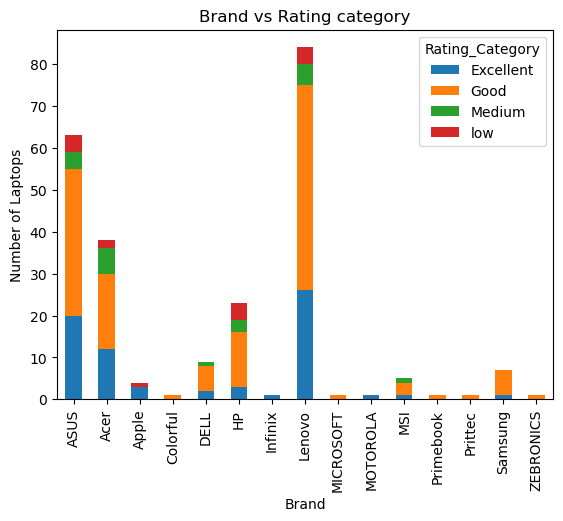

In [46]:
# Brand vs Rating Category

brand_rating = pd.crosstab(df['Brand'] , df['Rating_Category'])
brand_rating.plot(kind='bar',stacked=True)
plt.xlabel("Brand")
plt.ylabel("Number of Laptops")
plt.title("Brand vs Rating category")
plt.show()